In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import sys
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.3)

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from path import DATA_PROCESSED_COHORT_DIR

In [2]:
psm = None
with open(DATA_PROCESSED_COHORT_DIR / "psm.pkl", 'rb') as pickle_file:
    psm = pickle.load(pickle_file)
psm.predicted_data

,index,onehotencoder__gender_f,onehotencoder__gender_m,age_scaled,propensity_score,propensity_logit,race
0,0CHRISTINGreig,1,0,-0.790329,0.913417,2.356090,1
1,1HALRagland,0,1,1.035983,0.884245,2.033255,1
2,2LEIGHTONHopkins,1,0,-1.145446,0.919216,2.431744,1
3,3TONYWasson,0,1,0.477943,0.895869,2.152141,1
4,4ARTURMiller,0,1,-0.485944,0.913528,2.357489,1
...,...,...,...,...,...,...,...
50004,4995MISTYCrawford,1,0,-0.029366,0.899707,2.193973,0
50005,4996ADABarlow,1,0,1.391099,0.868910,1.891354,0
50006,4997TYRONEHaileselassie,0,1,-0.841060,0.919320,2.433144,0
50007,4998OLIVEBrown,1,0,2.152063,0.849315,1.729237,0


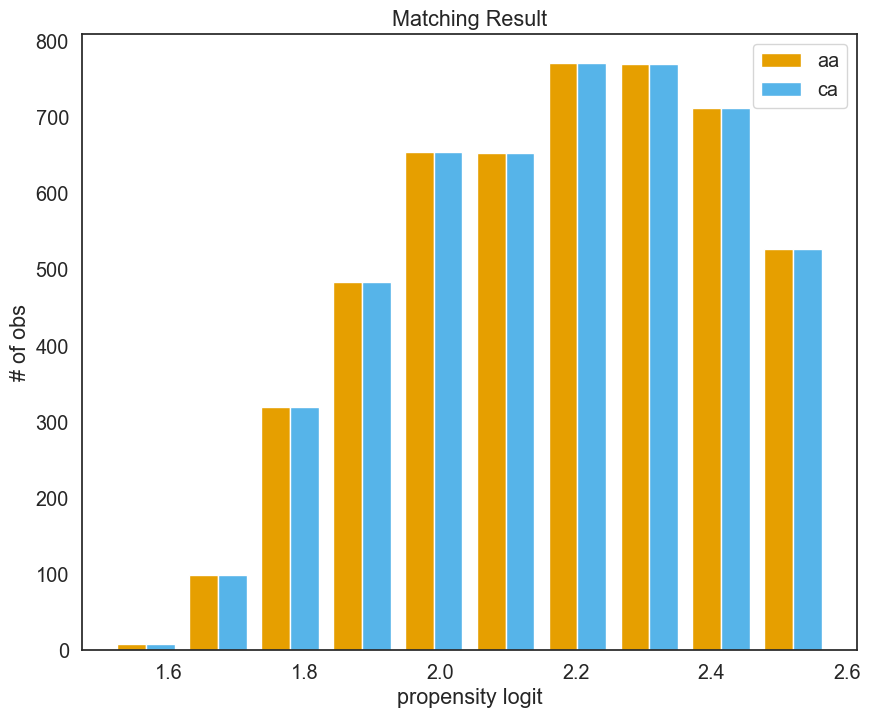

In [3]:
psm.plot_match(
    Title="Matching Result",
    Ylabel="# of obs",
    Xlabel="propensity logit",
    names=["aa", "ca"],
)

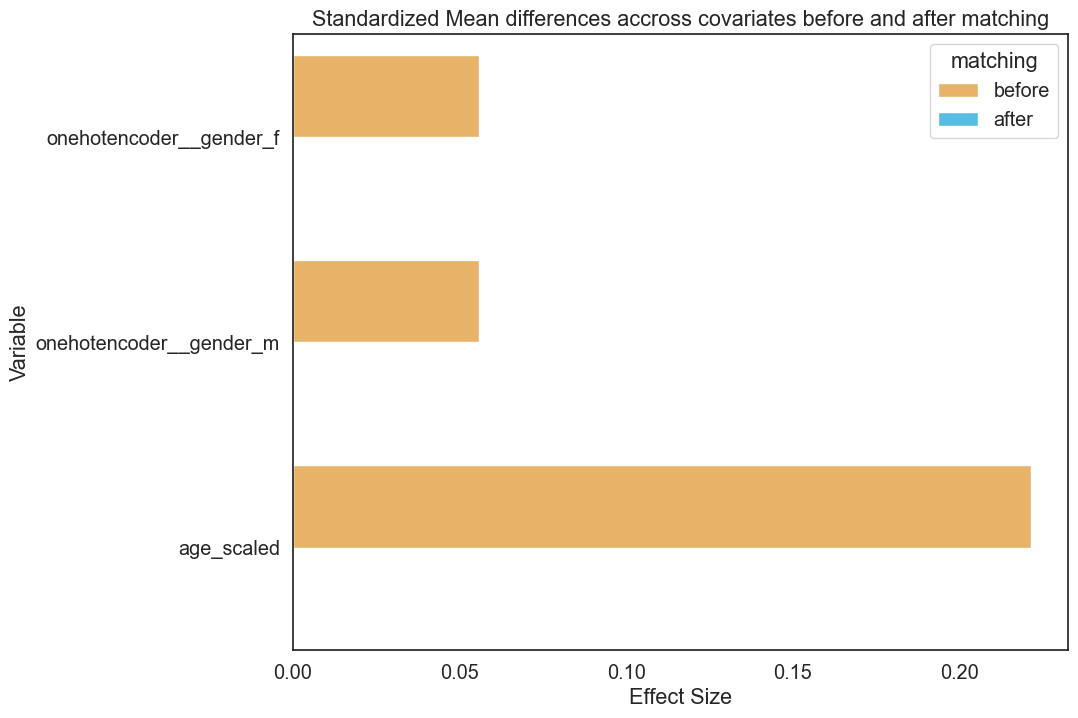

In [4]:
psm.effect_size_plot()

In [5]:
psm.effect_size

,Variable,matching,Effect Size
0,onehotencoder__gender_f,before,0.055878
1,onehotencoder__gender_f,after,0.000000
2,onehotencoder__gender_m,before,0.055878
3,onehotencoder__gender_m,after,0.000000
4,age_scaled,before,0.221595
5,age_scaled,after,0.000010


In [6]:
psm.df_matched

,index,onehotencoder__gender_f,onehotencoder__gender_m,age_scaled,propensity_score,propensity_logit,race,matched_ID
0,0TAMIKABridgewater,1,0,-0.029366,0.899707,2.193973,0,43634MARGARITAYanny
1,1JAMILARansom,1,0,-0.181559,0.902595,2.226396,0,22558SHERIETucker
2,2RICKIBrock,1,0,-0.435213,0.907244,2.280435,0,44759AMBERWarner
3,3WENDELLPorter,0,1,1.543292,0.872715,1.925177,0,21681LAWRENCEWaite
4,4TYLee,0,1,-1.043984,0.922469,2.476375,0,1337MARCINBertaud
...,...,...,...,...,...,...,...,...
9995,29489WENDIRosa,1,0,-0.029366,0.899707,2.193973,1,NaN
9996,29952NICKYEshleman,1,0,1.391099,0.868910,1.891354,1,NaN
9997,27002NATEWood,0,1,-0.841060,0.919320,2.433144,1,NaN
9998,31736MARGENEJustus,1,0,2.152063,0.849315,1.729237,1,NaN


In [7]:
psm.matched_ids

,index,matched_ID
0,0TAMIKABridgewater,43634MARGARITAYanny
1,1JAMILARansom,22558SHERIETucker
2,2RICKIBrock,44759AMBERWarner
3,3WENDELLPorter,21681LAWRENCEWaite
4,4TYLee,1337MARCINBertaud
...,...,...
4995,4995MISTYCrawford,29489WENDIRosa
4996,4996ADABarlow,29952NICKYEshleman
4997,4997TYRONEHaileselassie,27002NATEWood
4998,4998OLIVEBrown,31736MARGENEJustus


In [8]:
aa_matched_dataset = pd.read_csv(DATA_PROCESSED_COHORT_DIR / "aa_matched.csv")
ca_matched_dataset = pd.read_csv(DATA_PROCESSED_COHORT_DIR / "ca_matched.csv")

In [9]:
ca_matched_dataset

,first_name,last_name,age,gender
0,BOBBI,Payne,39,f
1,EDWARD,Boyett,83,m
2,SANDRA,Rapp,50,f
3,IRENA,Greer,54,f
4,FRAN,Diab,59,f
...,...,...,...,...
4995,KARLENE,Mack,78,f
4996,JEROD,Rioux,22,m
4997,SHERRYL,Aden,65,f
4998,RICKEY,Wright,66,m


In [10]:
aa_matched_dataset

,first_name,last_name,age,gender
0,TAMIKA,Bridgewater,47,f
1,JAMILA,Ransom,44,f
2,RICKI,Brock,39,f
3,WENDELL,Porter,78,m
4,TY,Lee,27,m
...,...,...,...,...
4995,MISTY,Crawford,47,f
4996,ADA,Barlow,75,f
4997,TYRONE,Haileselassie,31,m
4998,OLIVE,Brown,90,f


In [11]:
ca_matched_dataset.describe()

,age
count,5000.000000
mean,51.501400
std,20.629831
min,18.000000
25%,34.000000
50%,50.000000
75%,68.000000
max,109.000000


In [12]:
aa_matched_dataset.describe()

,age
count,5000.000000
mean,51.501600
std,20.630393
min,18.000000
25%,34.000000
50%,50.000000
75%,68.000000
max,110.000000


In [13]:
ca_matched_dataset["gender"].value_counts()

gender
f    2955
m    2045
Name: count, dtype: int64

In [14]:
aa_matched_dataset["gender"].value_counts()

gender
f    2955
m    2045
Name: count, dtype: int64